# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | horta
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | mount pearl
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | moss bluff
Processing Record 7 of Set 1 | kyshtovka
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | severo-yeniseyskiy
Processing Record 12 of Set 1 | porto novo
Processing Record 13 of Set 1 | uturoa
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 19 of Set 1 | queenstown
Processing Record 20 of Set 1 | sao vicente
Processing Record 21 of Set 1 | isafjordur
Processing 

Processing Record 39 of Set 4 | strezhevoy
Processing Record 40 of Set 4 | kerikeri
Processing Record 41 of Set 4 | constantia
Processing Record 42 of Set 4 | nogliki
Processing Record 43 of Set 4 | anna regina
Processing Record 44 of Set 4 | kailua-kona
Processing Record 45 of Set 4 | mont-dore
Processing Record 46 of Set 4 | east london
Processing Record 47 of Set 4 | orsa
Processing Record 48 of Set 4 | tyukhtet
Processing Record 49 of Set 4 | pechora
Processing Record 0 of Set 5 | arendal
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | safaga
Processing Record 3 of Set 5 | laojunmiao
Processing Record 4 of Set 5 | neratovice
Processing Record 5 of Set 5 | tazovsky
Processing Record 6 of Set 5 | howrah
Processing Record 7 of Set 5 | hermanus
Processing Record 8 of Set 5 | zamora
Processing Record 9 of Set 5 | fale old settlement
Processing Record 10 of Set 5 | lihue
Processing Record 11 of Set 5 | saint-georges
Processing Record 12 of Set 5 | susuman
Processin

Processing Record 35 of Set 8 | cromer
Processing Record 36 of Set 8 | wynyard
Processing Record 37 of Set 8 | fazilpur
Processing Record 38 of Set 8 | udachny
Processing Record 39 of Set 8 | namibe
Processing Record 40 of Set 8 | lusambo
Processing Record 41 of Set 8 | inhambane
Processing Record 42 of Set 8 | umm kaddadah
Processing Record 43 of Set 8 | nadi
Processing Record 44 of Set 8 | seogwipo
City not found. Skipping...
Processing Record 45 of Set 8 | kwaksan
Processing Record 46 of Set 8 | katsuura
Processing Record 47 of Set 8 | kolonia
Processing Record 48 of Set 8 | ciudad de cuetzalan
City not found. Skipping...
Processing Record 49 of Set 8 | tismana
Processing Record 0 of Set 9 | pacific grove
Processing Record 1 of Set 9 | motueka
Processing Record 2 of Set 9 | saudarkrokur
Processing Record 3 of Set 9 | kozloduy
Processing Record 4 of Set 9 | salinas
Processing Record 5 of Set 9 | es castell
Processing Record 6 of Set 9 | mahibadhoo
Processing Record 7 of Set 9 | kenor

Processing Record 23 of Set 12 | orumiyeh
Processing Record 24 of Set 12 | el granada
Processing Record 25 of Set 12 | revelstoke
Processing Record 26 of Set 12 | pemangkat
Processing Record 27 of Set 12 | nikol'sk
Processing Record 28 of Set 12 | colares
Processing Record 29 of Set 12 | kidal
Processing Record 30 of Set 12 | marsh harbour
Processing Record 31 of Set 12 | westport
Processing Record 32 of Set 12 | rosalie
Processing Record 33 of Set 12 | nagqu
Processing Record 34 of Set 12 | chota
Processing Record 35 of Set 12 | hakuba
City not found. Skipping...
Processing Record 36 of Set 12 | forster
Processing Record 37 of Set 12 | belmonte
Processing Record 38 of Set 12 | northam
Processing Record 39 of Set 12 | kalmunai
Processing Record 40 of Set 12 | arenapolis
Processing Record 41 of Set 12 | tezu
Processing Record 42 of Set 12 | persembe
Processing Record 43 of Set 12 | kale
Processing Record 44 of Set 12 | garzon
Processing Record 45 of Set 12 | mezhdurechenskiy
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,horta,38.5333,-28.6333,17.80,90,20,7.60,PT,1682537959
1,lebu,-37.6167,-73.6500,15.71,80,100,2.75,CL,1682537959
2,mount pearl,47.5166,-52.7813,3.86,81,100,7.72,CA,1682537863
3,port-aux-francais,-49.3500,70.2167,7.83,99,100,5.14,TF,1682537960
4,waitangi,-43.9535,-176.5597,11.57,81,97,3.58,NZ,1682537960


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,horta,38.5333,-28.6333,17.80,90,20,7.60,PT,1682537959
1,lebu,-37.6167,-73.6500,15.71,80,100,2.75,CL,1682537959
2,mount pearl,47.5166,-52.7813,3.86,81,100,7.72,CA,1682537863
3,port-aux-francais,-49.3500,70.2167,7.83,99,100,5.14,TF,1682537960
4,waitangi,-43.9535,-176.5597,11.57,81,97,3.58,NZ,1682537960


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

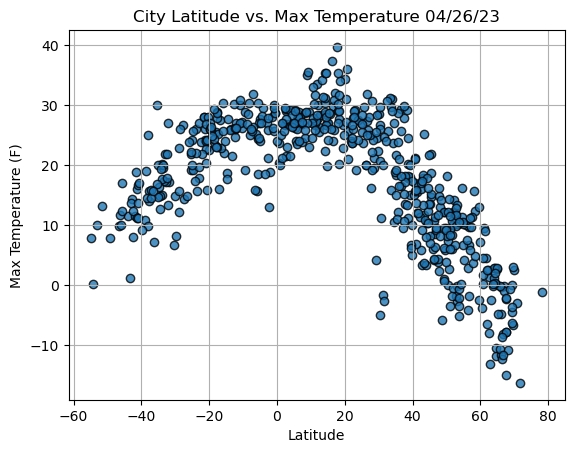

In [8]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities") 

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

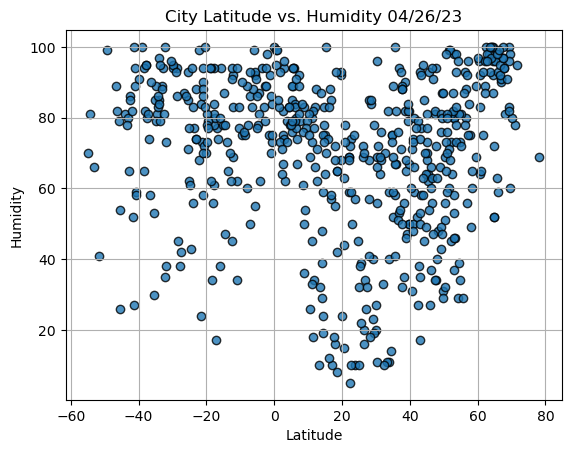

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities") 

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

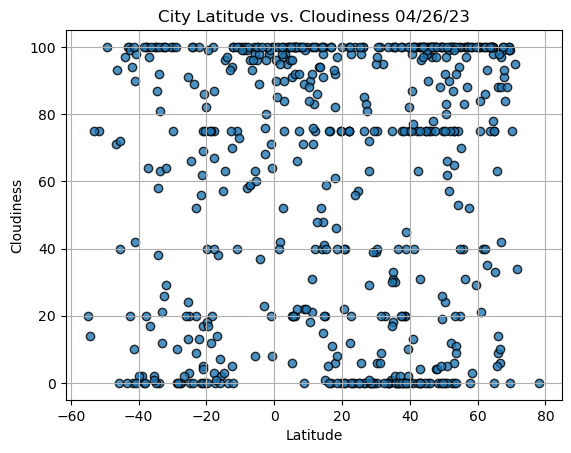

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities") 

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

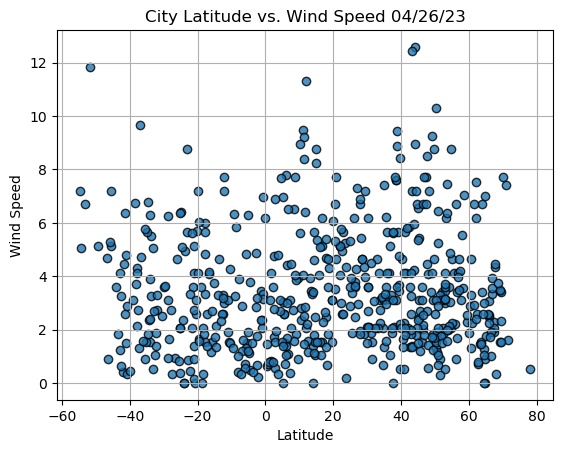

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()   

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,horta,38.5333,-28.6333,17.80,90,20,7.60,PT,1682537959
2,mount pearl,47.5166,-52.7813,3.86,81,100,7.72,CA,1682537863
5,moss bluff,30.3027,-93.1907,26.66,69,75,3.60,US,1682537961
6,kyshtovka,56.5550,76.6271,9.72,80,100,3.42,RU,1682537961
8,olonkinbyen,70.9221,-8.7187,-2.93,78,95,7.40,SJ,1682537962


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lebu,-37.6167,-73.6500,15.71,80,100,2.75,CL,1682537959
3,port-aux-francais,-49.3500,70.2167,7.83,99,100,5.14,TF,1682537960
4,waitangi,-43.9535,-176.5597,11.57,81,97,3.58,NZ,1682537960
7,edinburgh of the seven seas,-37.0676,-12.3116,15.79,74,97,9.68,SH,1682537961
12,uturoa,-16.7333,-151.4333,27.58,77,14,4.10,PF,1682537963


###  Temperature vs. Latitude Linear Regression Plot

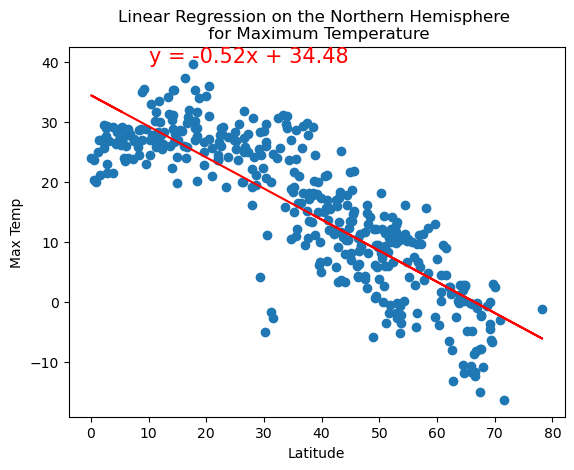

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

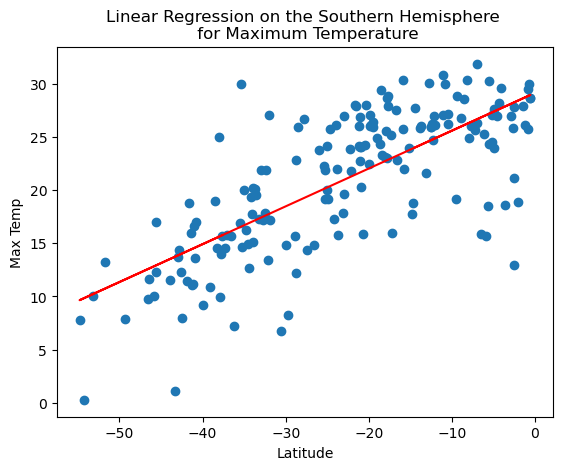

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [17]:
# The linear relationship between the northern hemisphere and max temperature shows that as the latitude increases from 0, the max temperatures decreases.

# The linear relationship between the southern hemisphere and max temperature show that as the latitude increases closer to 0, the max temperature increases

### Humidity vs. Latitude Linear Regression Plot

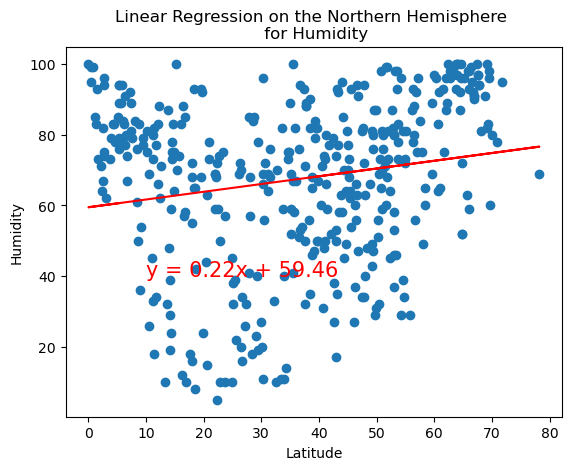

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Humidity',
                       'Humidity',(10,40))

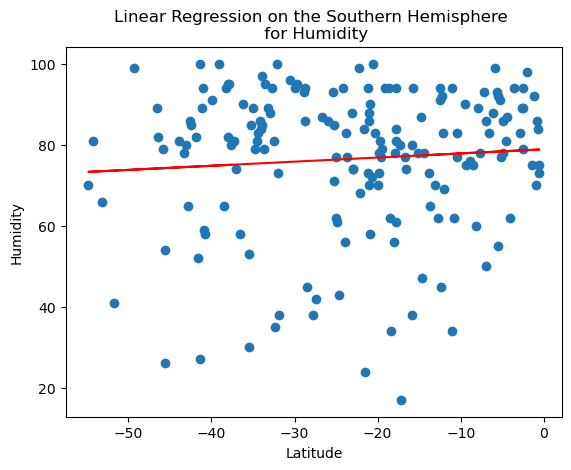

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity',
                       'Humidity',(10,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [20]:
# The linear relationship shows that the humidity increases as you increase in latitude.

### Cloudiness vs. Latitude Linear Regression Plot

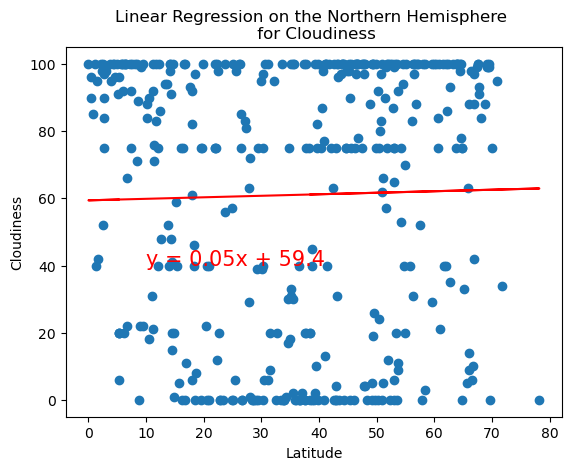

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness',
                       'Cloudiness',(10,40))

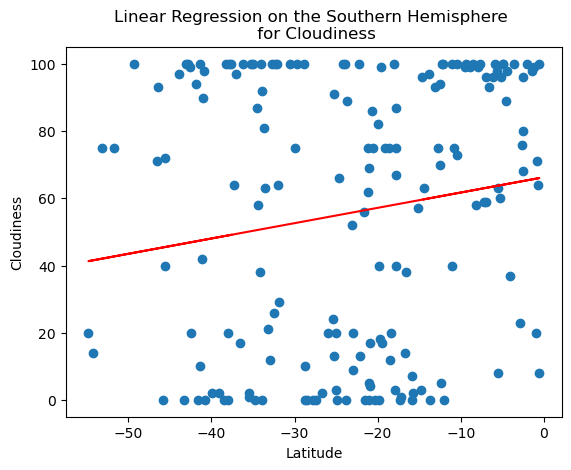

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness',
                       'Cloudiness',(10,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [23]:
# The linear relationship shows that the northern and southern hemisphere both flucuate in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

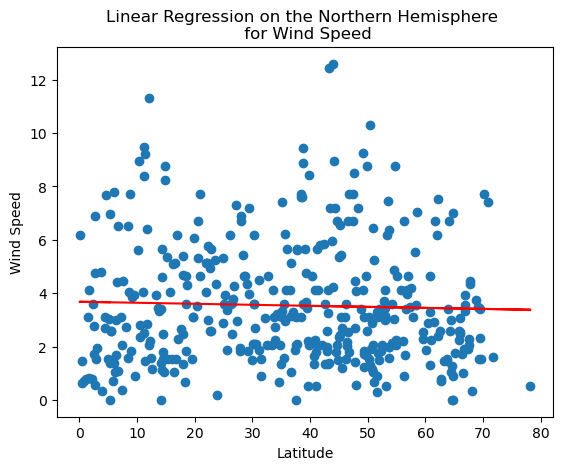

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',(10,40))

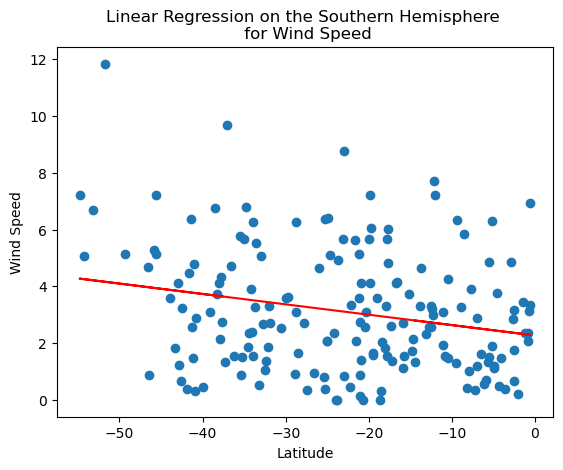

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(10,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [26]:
# The linear relationship between the northern hemisphere and wind speed shows that the wind speed remains constant as the latitude increases from 0.
#The linear relationship between the northern hemisphere and wind speed shows that the wind speed decreases as the latitude increases to 0.